                       Global power plant database prediction

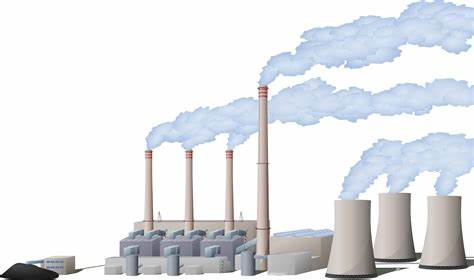

### Problem Statement:
###### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database


#### The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### importing  some  important  libs 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
powrDF = pd.read_csv(r'power_plant.csv')

In [3]:
powrDF.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
powrDF.shape

(907, 27)

#### Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label (' Primary Fuel ') data type indicates that dependent variable data is categorical in nature and target / label 'capacity_mw' data type indicates that dependent variable data is continuous in nature.

In [5]:
powrDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From above information it is evident that a lot of null values are present in many columns.

In [6]:
powrDF.nunique()#unique elements in each column

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

#### checking for null values

In [7]:
powrDF.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

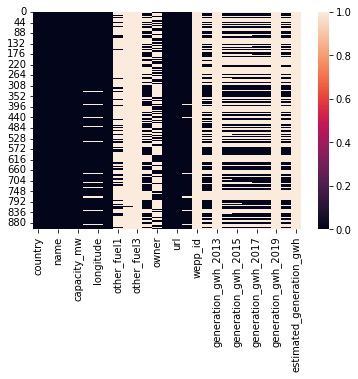

In [8]:
sns.heatmap(powrDF.isna())

Columns like other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh have no data available, so they will be dropped.

#### Getting the basic summary and statistical information of the data.

In [9]:
powrDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [10]:
powrDF.dtypes[powrDF.dtypes == 'object'] #Identifying the Categorical Columns

country                   object
country_long              object
name                      object
gppd_idnr                 object
primary_fuel              object
other_fuel1               object
other_fuel2               object
owner                     object
source                    object
url                       object
geolocation_source        object
generation_data_source    object
dtype: object

In [11]:
powrDF.dtypes[powrDF.dtypes != 'object']#Identifying the Continuous/discrete Columns

capacity_mw                 float64
latitude                    float64
longitude                   float64
other_fuel3                 float64
commissioning_year          float64
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
estimated_generation_gwh    float64
dtype: object

##### Statistical  description of  dataset

In [12]:
powrDF.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


From the above description it is observed that columns like capacity_mw, generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

A higher Std than mean in above columns indicates skewness.

#### dropping columns estimated_generation_gwh,wepp_id,owner,other_fuel3,other_fuel2,other_fuel1 since they contain insufficient amount of data.

In [13]:
powrDF.drop(columns=['estimated_generation_gwh','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1'],inplace=True)

In [14]:
powrDF

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,...,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### dropping columns url,country,country_long ,name, gppd_idnr since they don't contribute to building a good model for predicting the target variable values.

In [15]:
powrDF.drop(columns=['country','country_long','name','gppd_idnr','url'],inplace=True)

In [16]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
powrDF.dtypes[powrDF.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel              object
source                    object
geolocation_source        object
generation_data_source    object
dtype: object

In [18]:
powrDF.source.value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [19]:
powrDF.generation_data_source.value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [20]:
powrDF.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

##### dropping columns generation_data_source and source since they don't contribute to building a good model for predicting the target variable values.

In [21]:
powrDF.drop(columns=['generation_data_source','source'],inplace=True)

In [22]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
powrDF.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      907
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

#### Checking for unique categories in the categorical columns with null values

In [24]:
powrDF.dtypes[powrDF.dtypes == 'object'] #Identifying the Categorical Columns

primary_fuel          object
geolocation_source    object
dtype: object

In [25]:
powrDF.geolocation_source.isnull().sum()

19

In [26]:
powrDF.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

There are 3 unique categories in geolocation_source.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

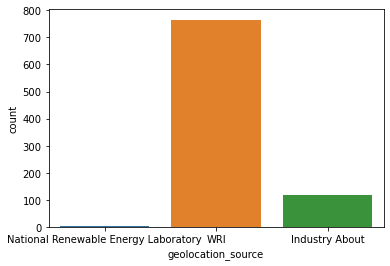

In [27]:
sns.countplot(powrDF.geolocation_source)

In [28]:
powrDF.geolocation_source.isnull().sum()/908*100 

2.092511013215859

2.09% of data is null. 

In [29]:
powrDF.geolocation_source.mode() # most frequently occuring value.

0    WRI
dtype: object

In [30]:
(powrDF['geolocation_source'] == 'WRI').sum()/powrDF.geolocation_source.count()*100 #checking the % share of most frequently occuring value.

86.14864864864865

86.16% of geolocation_source data is 'WRI'. 

#### Therefore imputing ' WRI' to NaN values in geolocation_source column

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [33]:
si = si.fit(powrDF[['geolocation_source']])

In [34]:
powrDF[['geolocation_source']] = si.transform(powrDF[['geolocation_source']])

In [35]:
powrDF[['geolocation_source']].isnull().sum()

geolocation_source    0
dtype: int64

There are no more null values in 'geolocation_source' column.

Checking for Null values in continuous / discrete columns.

In [36]:
powrDF.select_dtypes(exclude = object).isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      907
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

In [37]:
powrDF.latitude

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
902    16.2949
903    12.8932
904    15.2758
905    24.3500
906     9.9344
Name: latitude, Length: 907, dtype: float64

In [38]:
powrDF.longitude

0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
902    77.3568
903    78.1654
904    75.5811
905    73.7477
906    77.4768
Name: longitude, Length: 907, dtype: float64

#### Using KNN Imputation technique for imputing missing data.

In [39]:
from sklearn.impute import KNNImputer

In [40]:
imp = KNNImputer(n_neighbors=2)

In [41]:
powrDF[['latitude','longitude']] = imp.fit_transform(powrDF[['latitude','longitude']])

In [42]:
powrDF[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

There are no more values missing from 'latitude' and 'longitude' columns.

In [43]:
powrDF.commissioning_year.isnull().sum()/908*100 

41.85022026431718

41.85% of commissioning_year is NaN

In [44]:
powrDF.commissioning_year.mode()

0    2015.0
dtype: float64

In [45]:
powrDF.commissioning_year.mode()

0    2015.0
dtype: float64

In [46]:
(powrDF['commissioning_year'] == 2013.0).sum()/powrDF.commissioning_year.count()*100 #checking the % share of most frequently occuring value.

4.743833017077799

In [47]:
powrDF.commissioning_year.mean()

1997.0910815939278

In [48]:
powrDF.commissioning_year.median()

2001.0

In [49]:
(powrDF['commissioning_year'] == 1996.0).sum()/powrDF.commissioning_year.count()*100 #checking the % share of mean year value.

2.4667931688804554

In [50]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['commissioning_year']])
powrDF[['commissioning_year']] = si.transform(powrDF[['commissioning_year']])
powrDF[['commissioning_year']].isnull().sum()

commissioning_year    0
dtype: int64

In [51]:
powrDF.commissioning_year = powrDF.commissioning_year.astype('int64') #converting to int data type.

In [52]:
powrDF.commissioning_year

0      2011
1      2001
2      2001
3      2004
4      2015
       ... 
902    2016
903    2001
904    2001
905    2001
906    2001
Name: commissioning_year, Length: 907, dtype: int64

In [53]:
powrDF.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

#### Dropping column year_of_capacity_data as all the values in it are '2018.0'

In [54]:
powrDF.drop(columns = 'year_of_capacity_data',inplace = True)

In [55]:
powrDF.shape

(907, 13)

In [56]:
powrDF.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

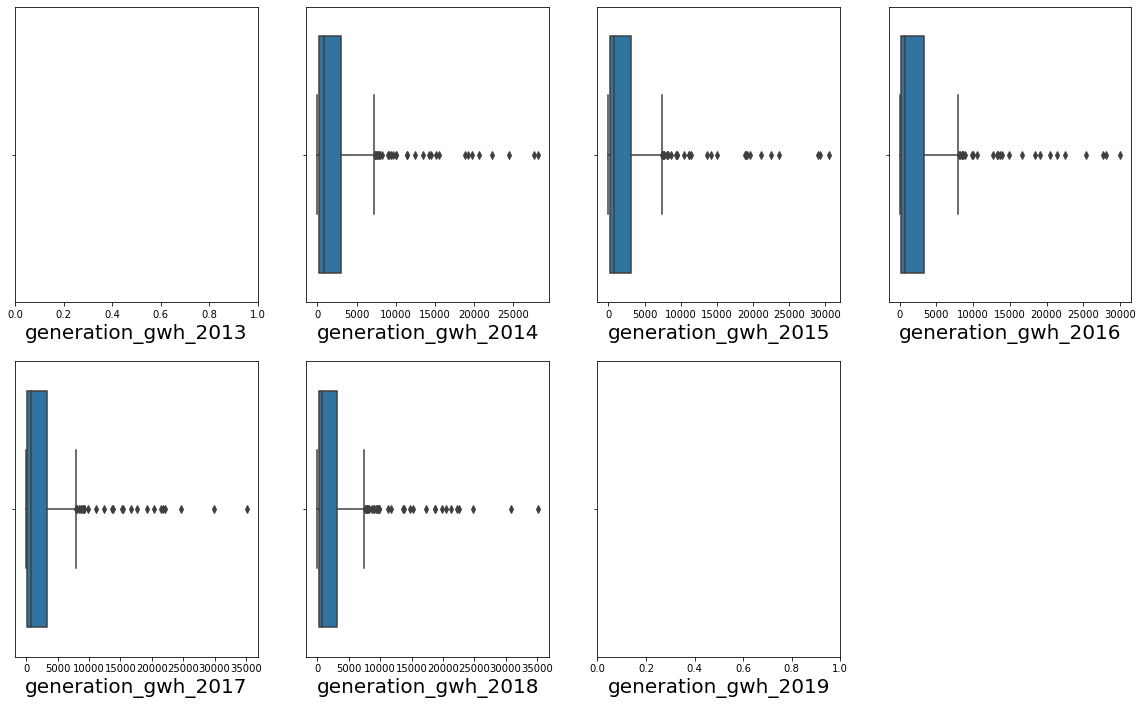

In [57]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year',])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

outliers exist, therefore imputing with KNN imputation technique.

In [58]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2018']])
powrDF[['generation_gwh_2018']] = si.transform(powrDF[['generation_gwh_2018']])
powrDF[['generation_gwh_2018']].isnull().sum()

generation_gwh_2018    0
dtype: int64

In [59]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2014']])
powrDF[['generation_gwh_2014']] = si.transform(powrDF[['generation_gwh_2014']])
powrDF[['generation_gwh_2014']].isnull().sum()

generation_gwh_2014    0
dtype: int64

In [60]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2015']])
powrDF[['generation_gwh_2015']] = si.transform(powrDF[['generation_gwh_2015']])
powrDF[['generation_gwh_2015']].isnull().sum()

generation_gwh_2015    0
dtype: int64

In [61]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2016']])
powrDF[['generation_gwh_2016']] = si.transform(powrDF[['generation_gwh_2016']])
powrDF[['generation_gwh_2016']].isnull().sum()

generation_gwh_2016    0
dtype: int64

In [62]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'median',verbose = 0 )
si = si.fit(powrDF[['generation_gwh_2017']])
powrDF[['generation_gwh_2017']] = si.transform(powrDF[['generation_gwh_2017']])
powrDF[['generation_gwh_2017']].isnull().sum()

generation_gwh_2017    0
dtype: int64

In [63]:
powrDF.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019    907
dtype: int64

In [64]:
powrDF.drop(['generation_gwh_2013','generation_gwh_2019'], axis=1, inplace=True)

In [65]:
powrDF.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

#### There are no more null values in the dataframe.

#### Extracting the age of Power plants from commissioning_year column will give a better insight into its relationship with target column data.

In [66]:
powrDF['Age'] = powrDF['commissioning_year'].apply(lambda y: 2021 - y) 

In [67]:
powrDF.drop(columns=['commissioning_year'],inplace=True)

In [68]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,10
1,98.0,24.7663,74.6090,Coal,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
2,39.2,21.9038,69.3732,Wind,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
3,135.0,23.8712,91.3602,Gas,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,17
4,1800.0,21.9603,82.4091,Coal,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,6
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,5
903,3.0,12.8932,78.1654,Solar,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,20
904,25.5,15.2758,75.5811,Wind,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20
905,80.0,24.3500,73.7477,Coal,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,20


####  Exploration of  the  data

#### Analyzing the continuous data type Target column

In [69]:
powrDF.capacity_mw

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

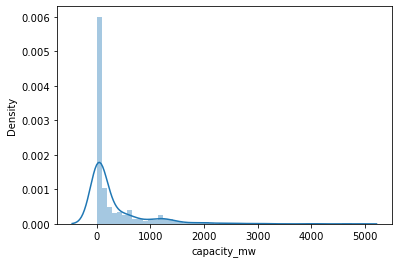

In [70]:
sns.distplot(powrDF.capacity_mw)

In [71]:
powrDF.select_dtypes(include = object).isnull().sum()

primary_fuel          0
geolocation_source    0
dtype: int64

In [72]:
powrDF.capacity_mw.skew()

3.123576153626497

Distribution of data is right skewed.

#### Analyzing Feature columns with Continuous Data.

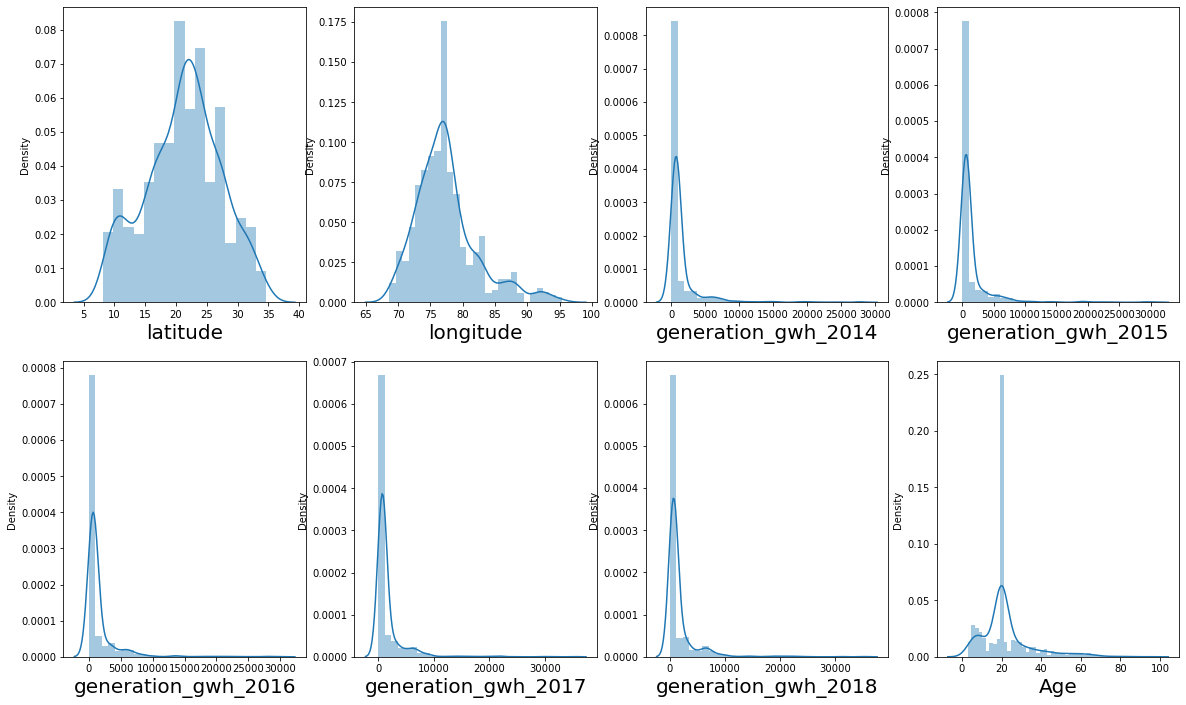

In [73]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(powrDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

data distributuions are skewed.            

#### capacity_mw vs continuous / discrete data type columns

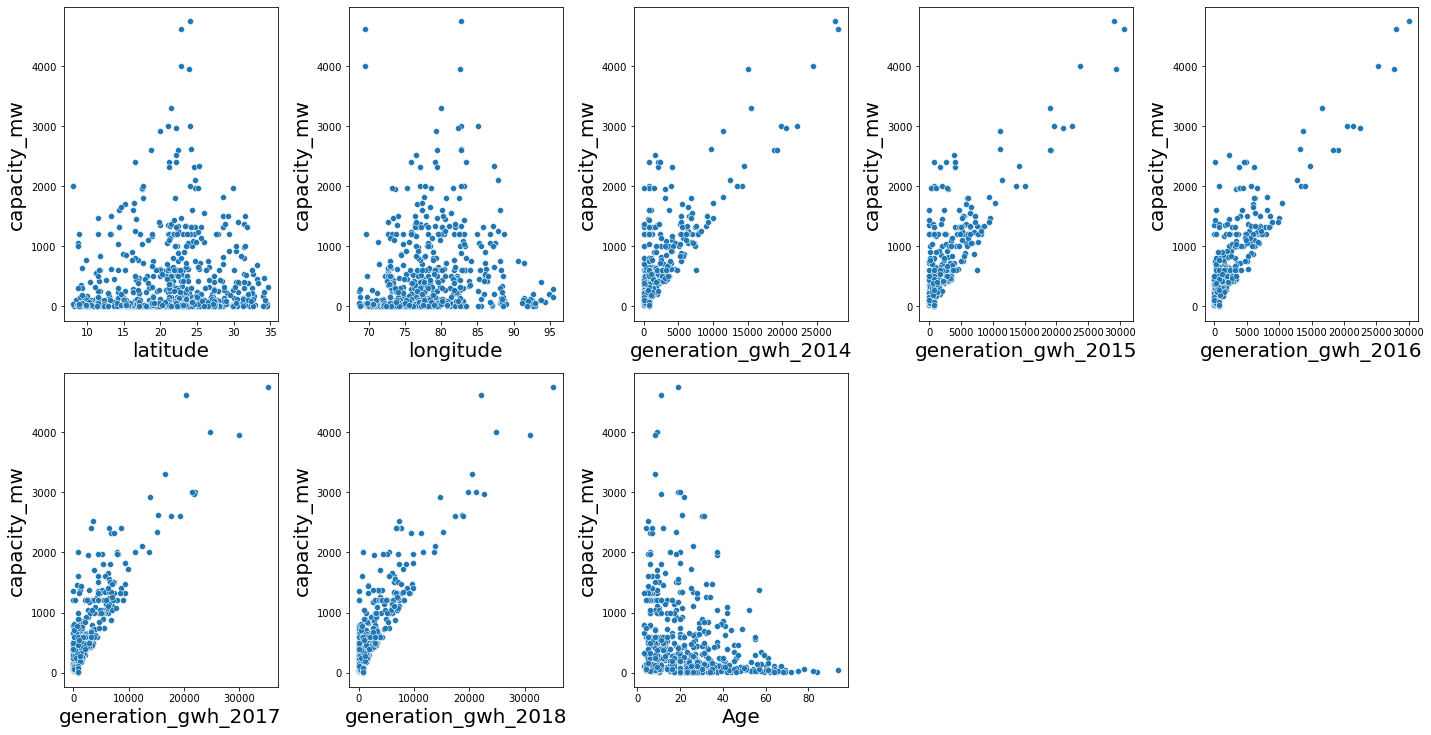

In [74]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = powrDF['capacity_mw']
X =  powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

We can observe a linear relationship between columns generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017

<Figure size 432x432 with 0 Axes>

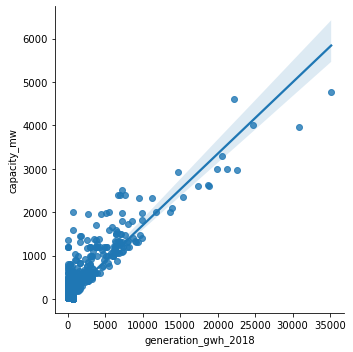

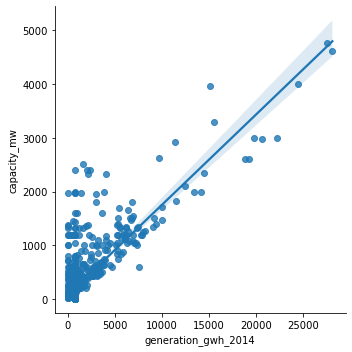

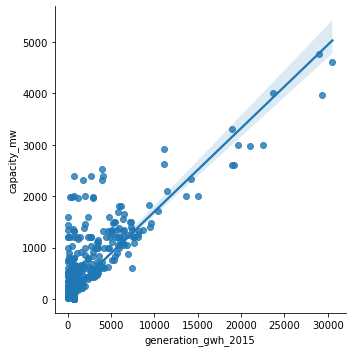

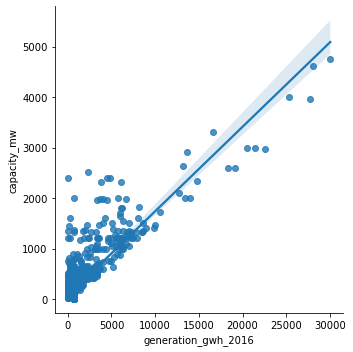

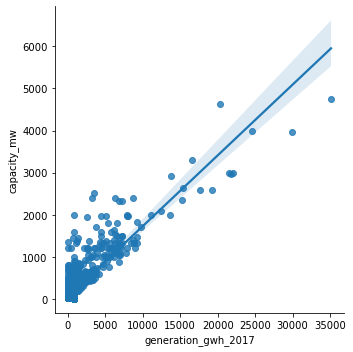

In [75]:
plt.figure(figsize=(6,6),facecolor='white')
X = ['generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for col in X:
    sns.lmplot(x = col,y = 'capacity_mw',data = powrDF)

#### capacity_mw vs categorical data type columns

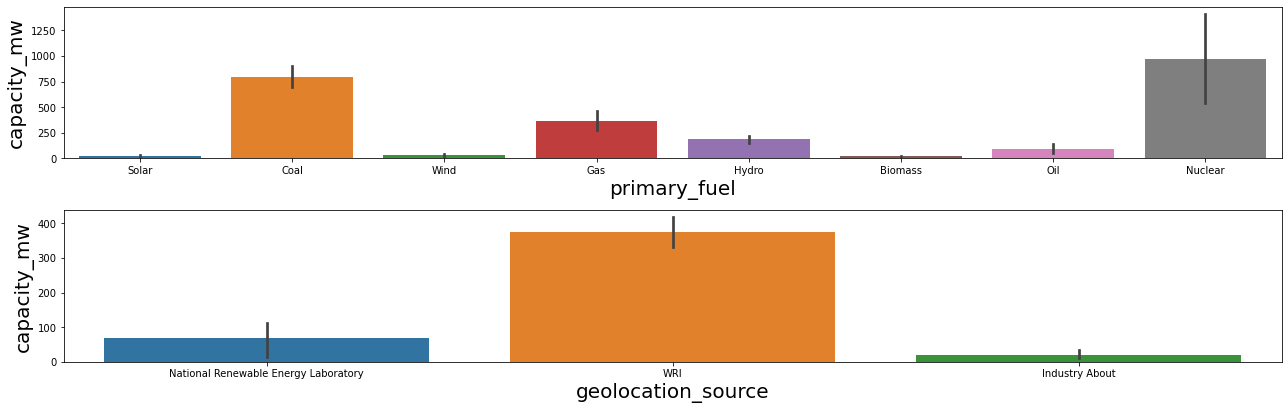

In [76]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = powrDF['capacity_mw']
X =  powrDF[['primary_fuel','geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

from the graphs above it is observed that Nuclear fuel type power plants have the highest capacity followed by coal type.

Most of the data for geolocation source is provided by WRI.

#### Analyzing the categorical data type Target column

In [77]:
powrDF.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are 8 unique categories in primary_fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

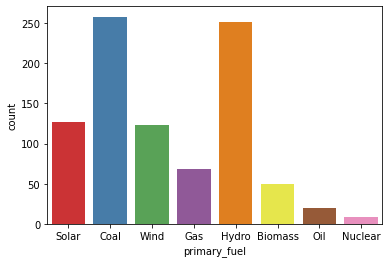

In [78]:
sns.countplot(powrDF['primary_fuel'], palette="Set1")

In [79]:
powrDF.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

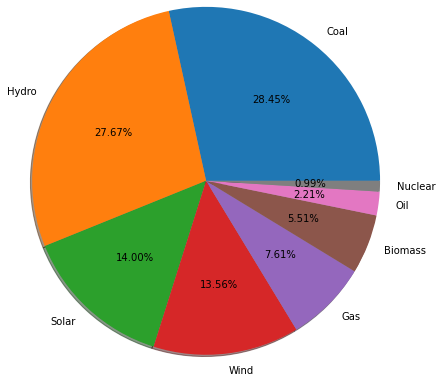

In [80]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots()
ax.pie(powrDF['primary_fuel'].value_counts(),labels = labels,radius =2,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class   
'Coal'   : Has 28.52% of total values

'Hydro'  : Has 27.53% of total values

'Solar'   : Has 13.99% of total values

'Wind'  : Has 13.55% of total values

'Gas'   : Has 7.60% of total values

'Biomass'  : Has 5.51% of total values

'Oil'   : Has 2.31% of total values

'Nuclear'  : Has 0.99% of total values

#### Classes are imbalanced.

### Interpreting Relationship between Dependent Variable and Independent Variables

##### 'primary_fuel' vs Continuous/Discrete Data Columns

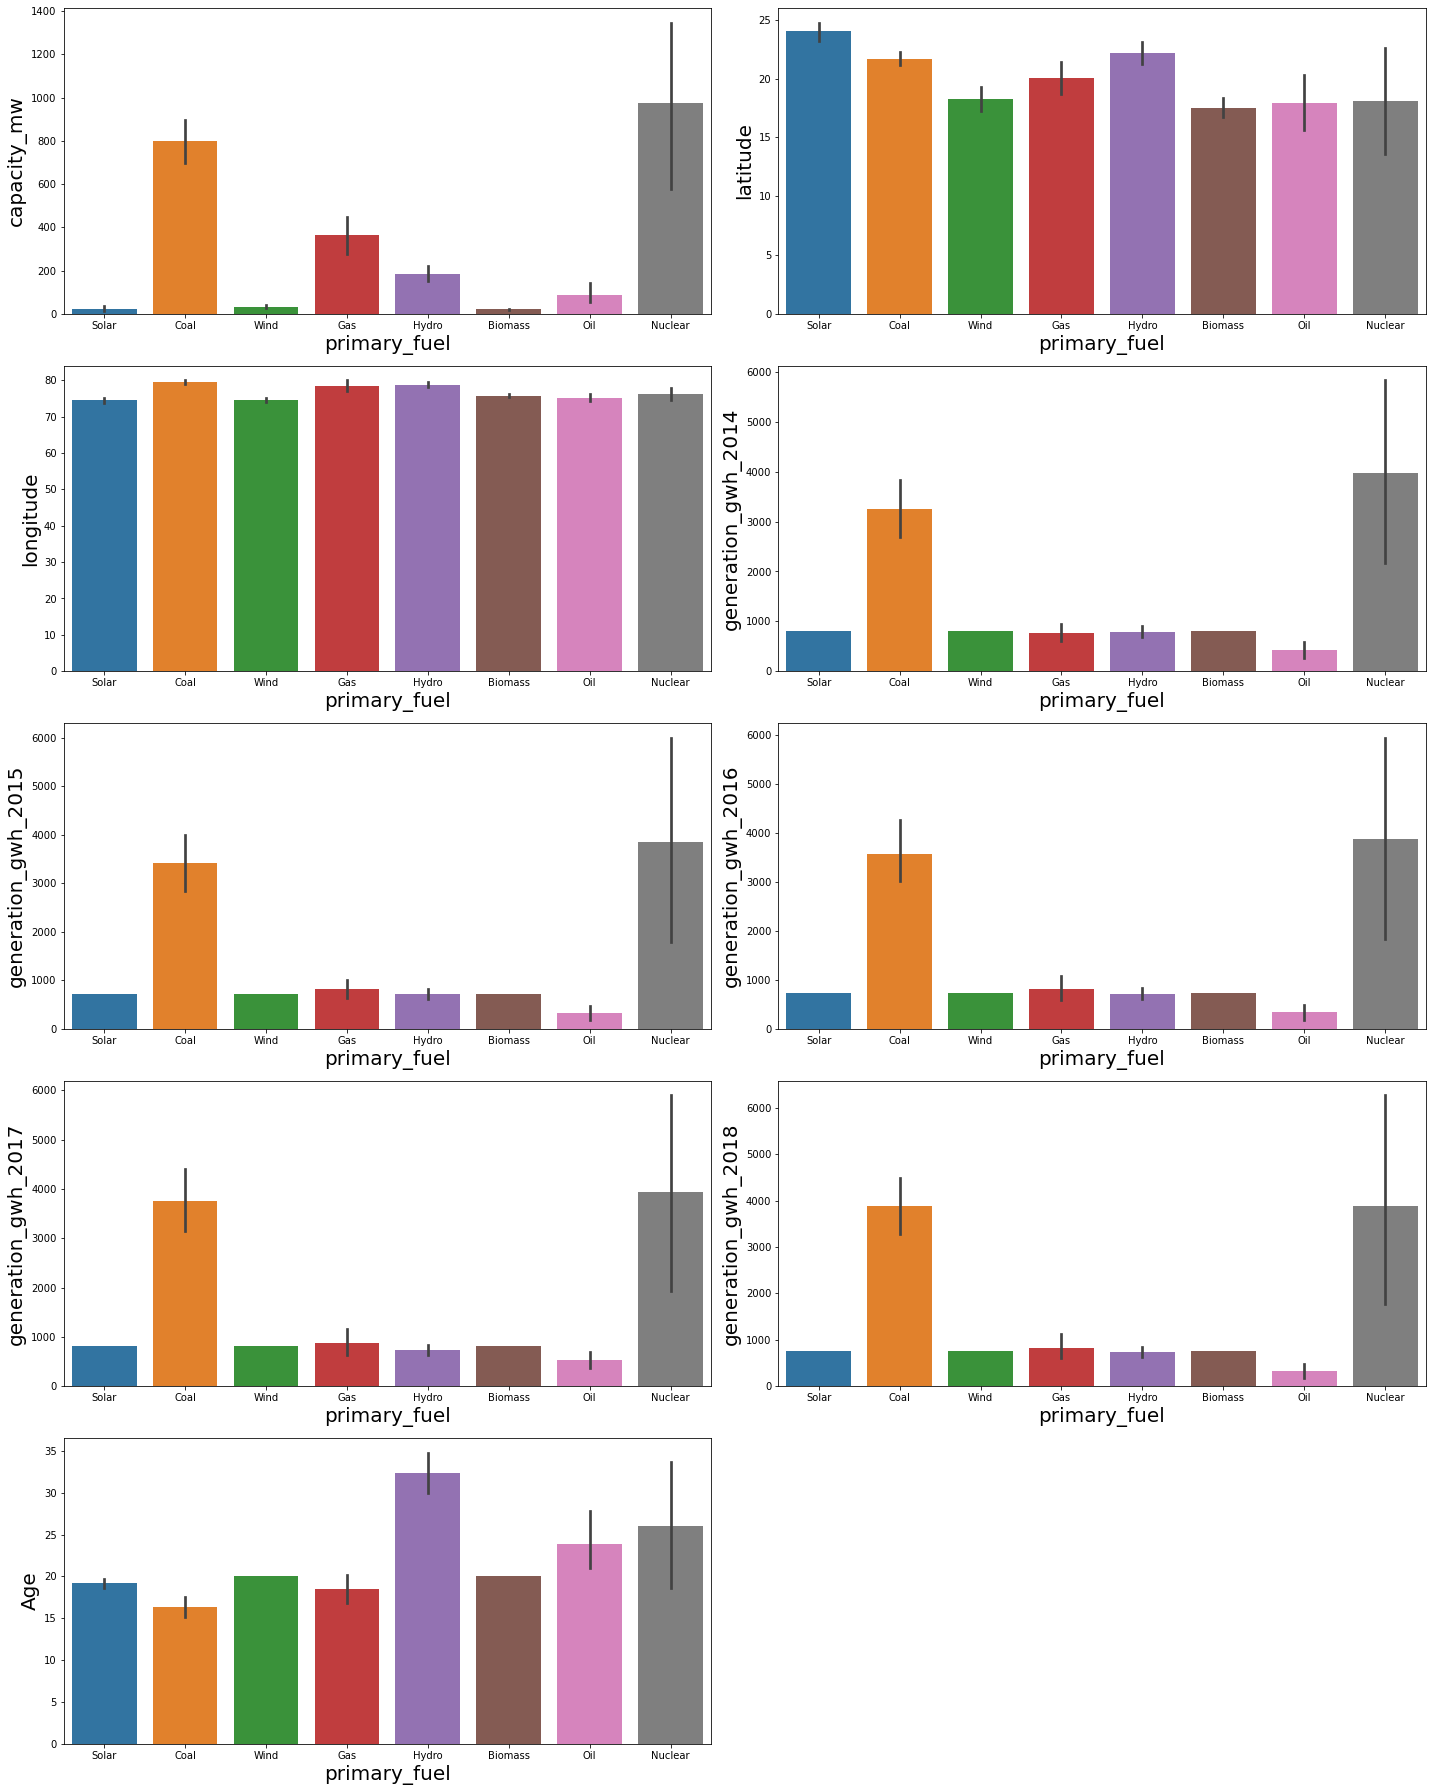

In [81]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = powrDF['primary_fuel']
X =  powrDF.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=15:
        plt.subplot(5,2,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('primary_fuel',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:
    
Highest power generation capacity belongs to Nuclear plants followed by Coal and then by Gas.

Hydro Power Plants have been running for the longest period.
      
While Power generation is the highest for Nuclear Plants, Power Generation has been on the rise for Coal power plants.   
    
    
    

#### 'primary_fuel' vs Categorical Data Columns

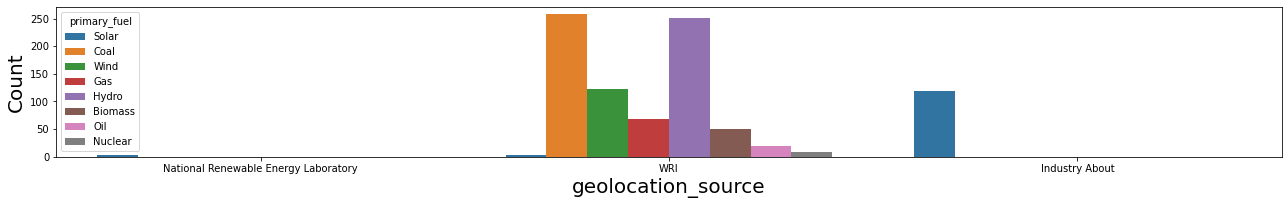

In [82]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = powrDF['primary_fuel']
X =  powrDF[['geolocation_source']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Most of the Geolocation Data is provided by WRI

### Checking for Outliers in columns with continuous distribution

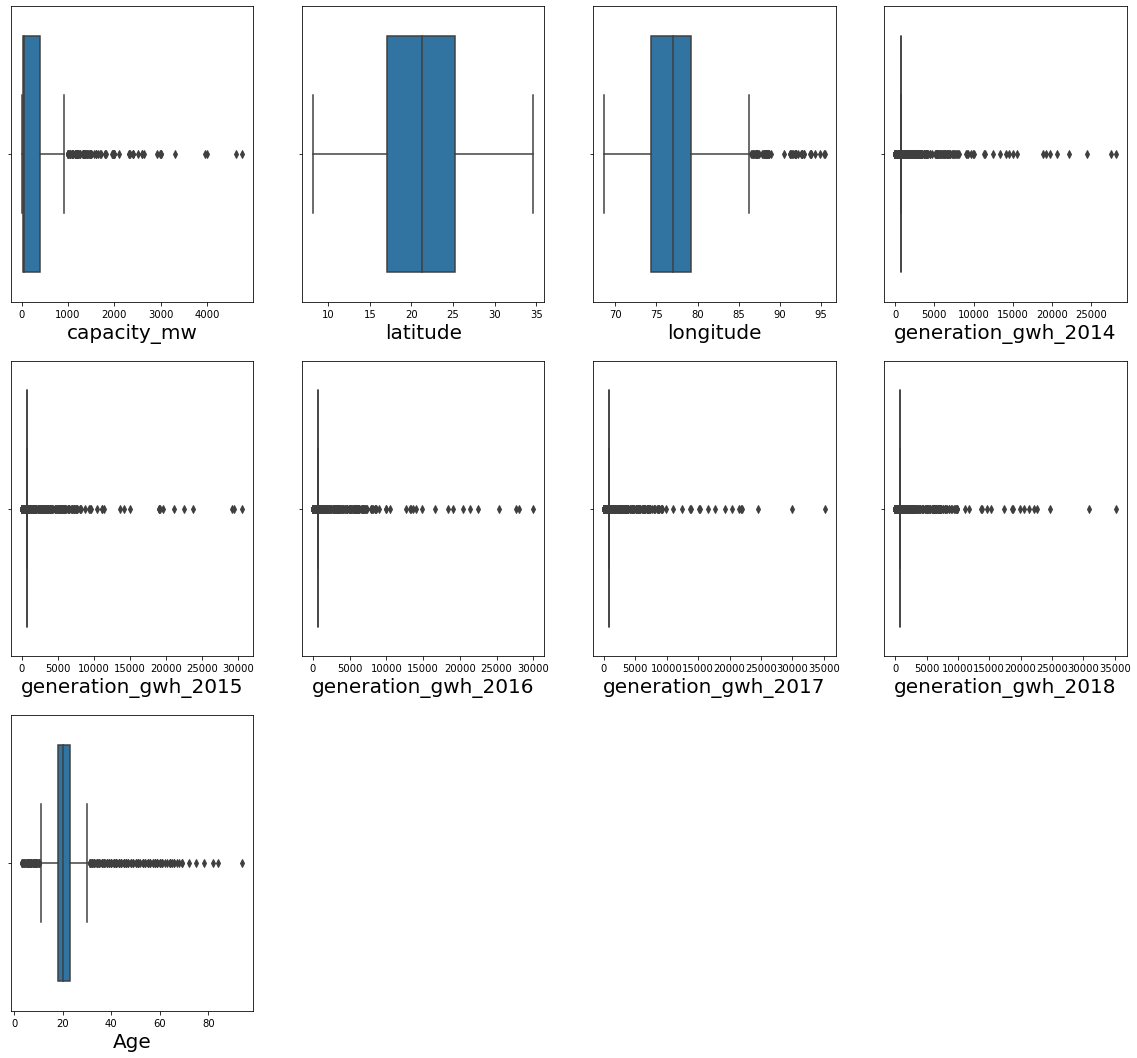

In [83]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns except latitude have a lot of outliers.

In [84]:
df2 = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [85]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [86]:
df3.shape

(851, 8)

In [87]:
df2.shape

(907, 8)

##### Data loss %:

In [88]:
loss=(908-852)/908 * 100
loss

6.167400881057269

6.16% Data loss is within acceptable range.

#### Using IQR Method

In [89]:
df = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [90]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [91]:
df = df.drop(indxdrop)

In [92]:
df.shape

(420, 8)

##### Data loss %:

In [93]:
loss=(908-422)/908 * 100
loss

53.524229074889874

53.52% data loss is outside acceptable range.

#### Using Z score method to reduce outliers

In [94]:
dropindx = powrDF.index.difference(df3.index)

In [95]:
powrDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [96]:
powrDF.shape

(851, 11)

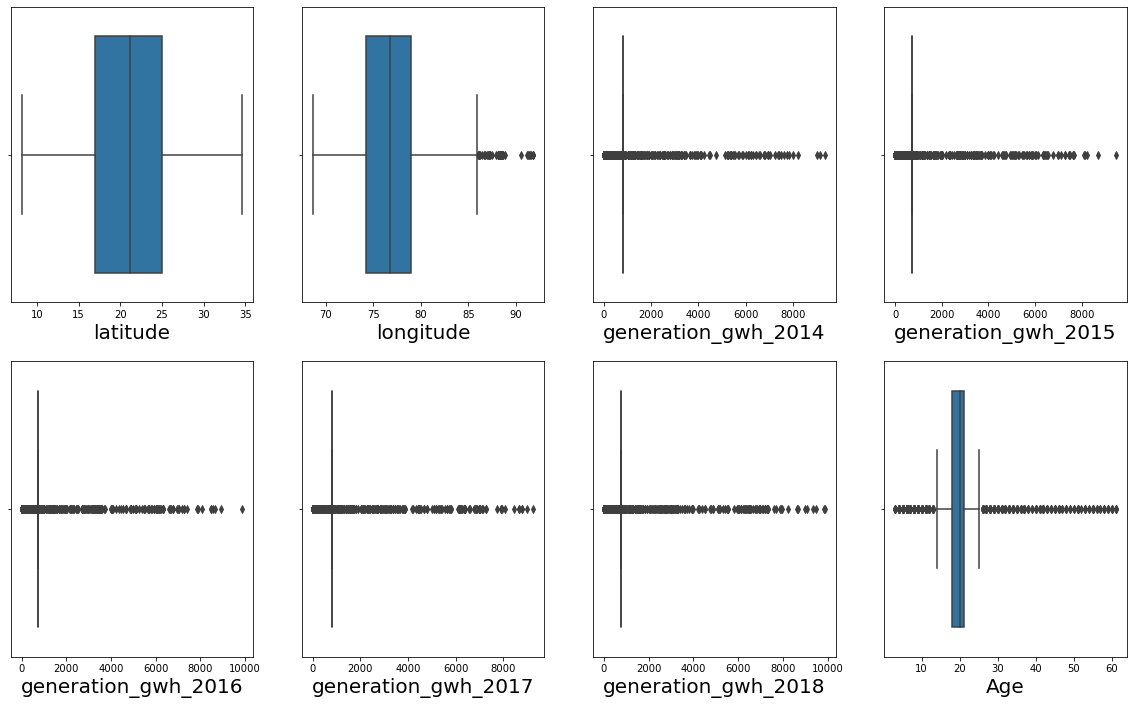

In [97]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
X = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed.

#### Checking for Skewness in Data

In [98]:
powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()

latitude              -0.119551
longitude              0.918693
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Age                    1.280800
dtype: float64

Skewness exists in all columns except latitude

#### Reducing skewness further using PowerTransformer

In [99]:
from sklearn.preprocessing import PowerTransformer

In [100]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [101]:
df4 = powrDF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [102]:
transformed= powtrans.fit_transform(df4)

In [103]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [104]:
transformed.skew()

latitude              -0.069485
longitude              0.000058
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Age                    0.026563
dtype: float64

Skewness has been greatly reduced

In [105]:
transformed.index = powrDF.index

In [106]:
powrDF[['latitude','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]=transformed[['latitude','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]

In [107]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age
0,2.5,1.171257,-0.930084,Solar,National Renewable Energy Laboratory,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.105732
1,98.0,0.596967,-0.511383,Coal,WRI,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594
2,39.2,0.120520,-2.364717,Wind,WRI,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594
3,135.0,0.447512,2.442641,Gas,WRI,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.248372
4,1800.0,0.129881,1.252442,Coal,WRI,1.426798,2.286603,2.276671,1.983083,2.347272,-1.776648
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,Coal,WRI,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983060
903,3.0,-1.345620,0.407395,Solar,Industry About,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594
904,25.5,-0.963692,-0.237493,Wind,WRI,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594
905,80.0,0.527406,-0.770182,Coal,WRI,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594


In [108]:
powrDF2 = powrDF.copy()

### Encoding the  categorical Feature Columns.

#### Encoding using get_dummies()

In [109]:
dumm = pd.get_dummies(powrDF[['geolocation_source','primary_fuel']],drop_first = False)

In [110]:
powrDF2 = powrDF2.join(dumm)

In [111]:
powrDF2.drop(columns = ['geolocation_source','primary_fuel'],axis = 1, inplace = True)

In [112]:
powrDF2

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.171257,-0.930084,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.105732,0,1,0,0,0,0,0,0,0,1,0
1,98.0,0.596967,-0.511383,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120520,-2.364717,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1,0,0,0,0,0,0,0,1
3,135.0,0.447512,2.442641,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.248372,0,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.129881,1.252442,1.426798,2.286603,2.276671,1.983083,2.347272,-1.776648,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983060,0,0,1,0,1,0,0,0,0,0,0
903,3.0,-1.345620,0.407395,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,1,0,0,0,0,0,0,0,0,1,0
904,25.5,-0.963692,-0.237493,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1,0,0,0,0,0,0,0,1
905,80.0,0.527406,-0.770182,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1,0,1,0,0,0,0,0,0


### Finding Correlation 

In [113]:
p_corr = powrDF2.corr()
p_corr

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.050307,0.256838,0.466805,0.519018,0.582540,0.603896,0.613179,-0.331141,-0.231883,-0.032010,0.234923,-0.143825,0.486687,0.063032,-0.101234,0.160586,-0.065498,-0.238330,-0.224380
latitude,0.050307,1.000000,-0.068115,0.105999,0.100775,0.119213,0.100141,0.107471,-0.106203,0.196149,0.073447,-0.207771,-0.151586,0.050766,-0.068712,0.099203,-0.050742,-0.082142,0.205059,-0.192004
longitude,0.256838,-0.068115,1.000000,0.033177,0.033772,0.089248,0.076899,0.098191,-0.144126,-0.293512,-0.085886,0.306214,-0.058114,0.326970,0.007780,0.158658,-0.014544,-0.059282,-0.298920,-0.250225
generation_gwh_2014,0.466805,0.105999,0.033177,1.000000,0.840179,0.783428,0.712174,0.714425,-0.041357,-0.017678,-0.003028,0.018025,-0.011008,0.328479,-0.163067,-0.181090,0.157903,-0.168384,-0.018368,-0.018111
generation_gwh_2015,0.519018,0.100775,0.033772,0.840179,1.000000,0.880793,0.771584,0.770922,-0.105553,-0.019717,-0.003377,0.020103,-0.012278,0.337284,-0.100538,-0.207007,0.116196,-0.189257,-0.020486,-0.020199
generation_gwh_2016,0.582540,0.119213,0.089248,0.783428,0.880793,1.000000,0.895963,0.885985,-0.192430,-0.018498,-0.003168,0.018860,-0.011519,0.387673,-0.146404,-0.219149,0.082791,-0.207532,-0.019220,-0.018950
generation_gwh_2017,0.603896,0.100141,0.076899,0.712174,0.771584,0.895963,1.000000,0.935698,-0.172890,-0.014133,-0.002421,0.014410,-0.008801,0.386078,-0.158242,-0.242864,0.080530,-0.137212,-0.014685,-0.014479
generation_gwh_2018,0.613179,0.107471,0.098191,0.714425,0.770922,0.885985,0.935698,1.000000,-0.182809,-0.022942,-0.003930,0.023392,-0.014286,0.380754,-0.174140,-0.188669,0.097367,-0.210643,-0.023838,-0.023504
Age,-0.331141,-0.106203,-0.144126,-0.041357,-0.105553,-0.192430,-0.172890,-0.182809,1.000000,0.020299,-0.094959,-0.001485,0.012640,-0.340585,-0.070923,0.356023,0.043135,0.053461,-0.019613,0.020796
geolocation_source_Industry About,-0.231883,0.196149,-0.293512,-0.017678,-0.019717,-0.018498,-0.014133,-0.022942,0.020299,1.000000,-0.027573,-0.980783,-0.100244,-0.250004,-0.115381,-0.236911,-0.041481,-0.062245,0.962438,-0.164921


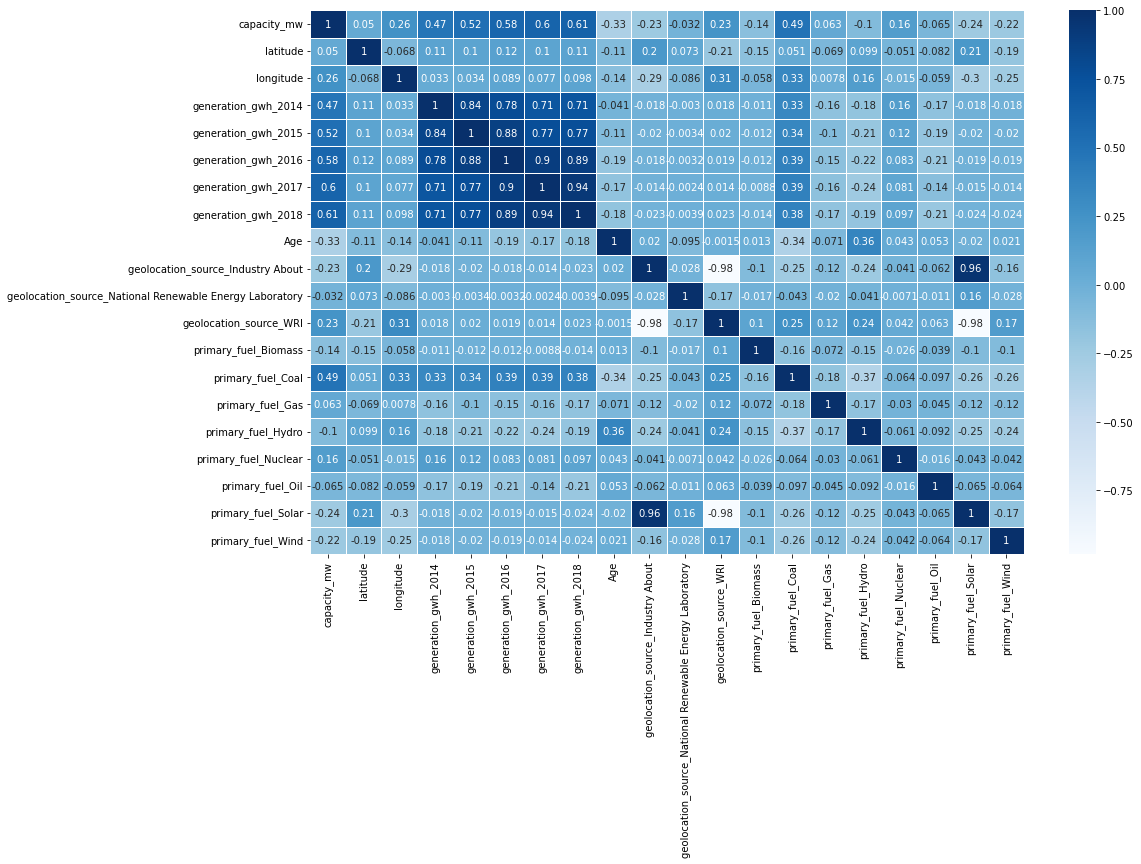

In [114]:
plt.figure(figsize=(16,10))
sns.heatmap(p_corr,annot=True,linewidth=1,  cmap='Blues')
plt.show()

### Visualizing correlation of feature columns with label column.

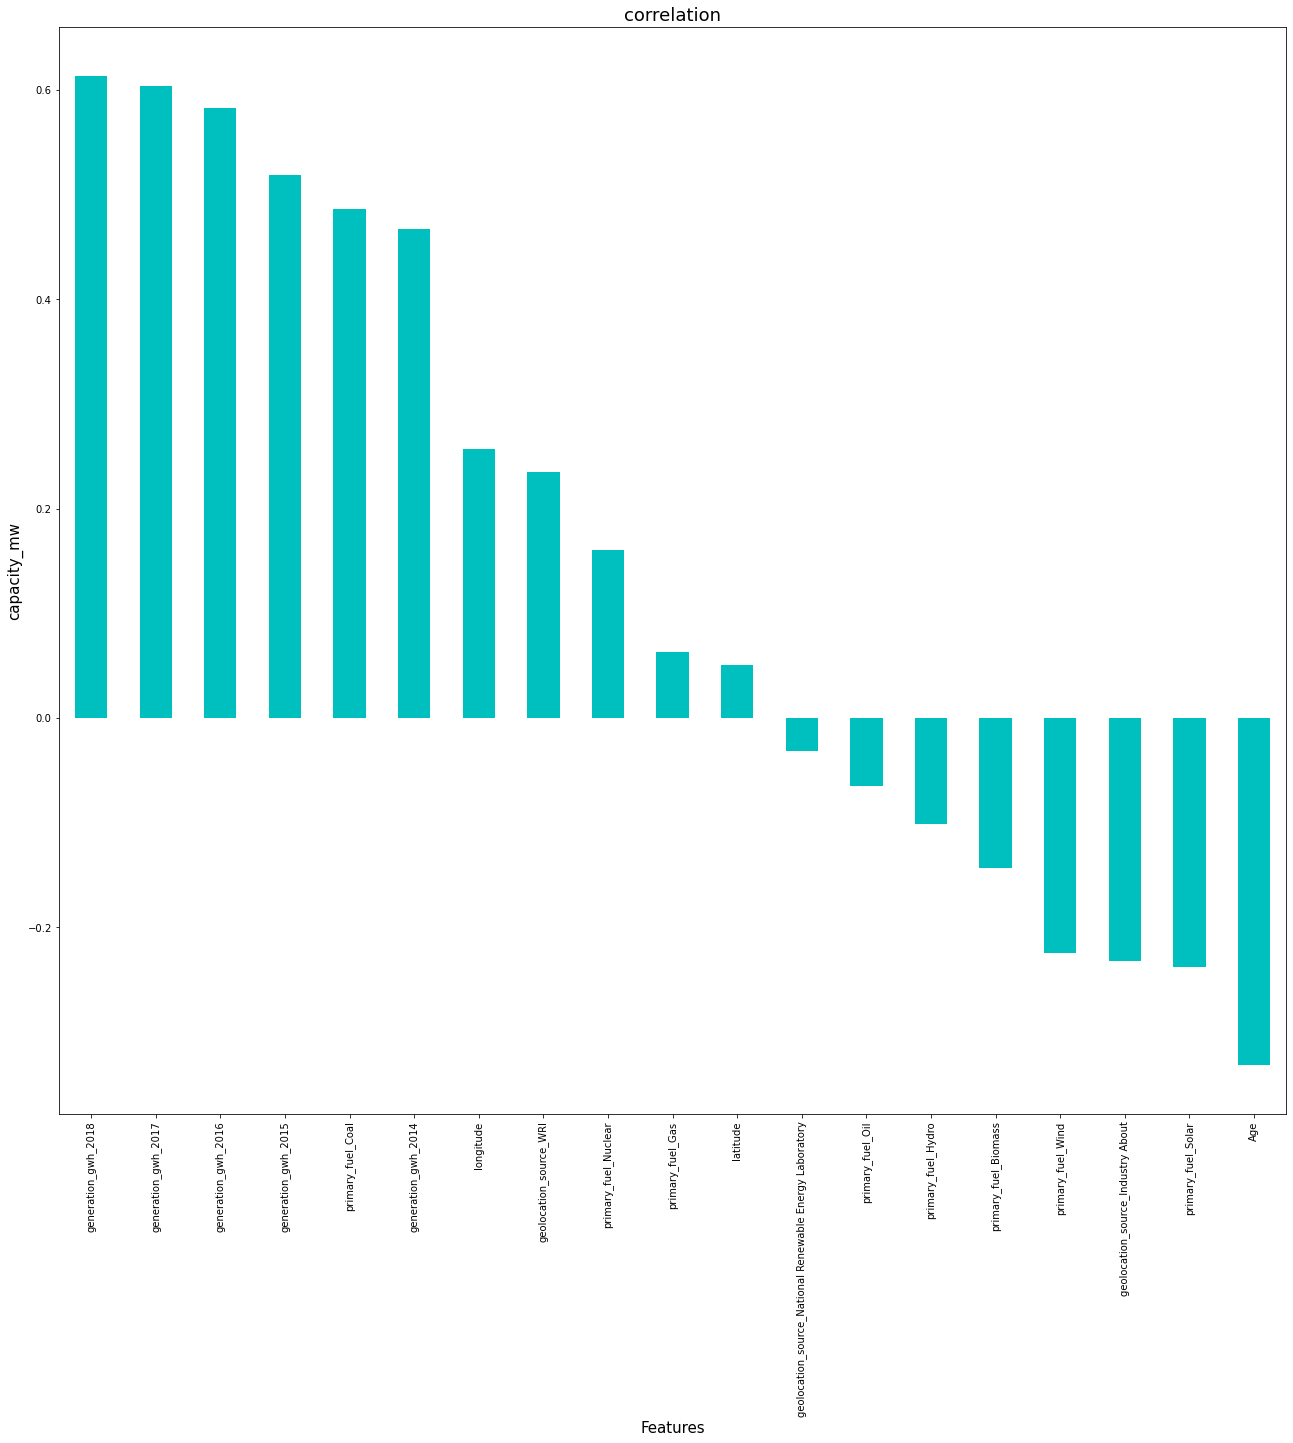

In [115]:
plt.figure(figsize = (22,20))
powrDF2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

primary_fuel_Coal,generation_gwh_2017,generation_gwh_2016,Longitude,generation_gwh_2015,geolocation_source_WRI have the highest positive correlation, while Age, Primary_fuel_Solar,geolocation_source_Industry About,Primary_fuel_Wind have the highest negative correlation with capacity_mw

#### Feature Scaling

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
X = powrDF2.drop(columns = ['capacity_mw'])
y = powrDF2['capacity_mw']

In [118]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

#### Checking for Multicollinearity using Variance Inflation Factor

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = pd.DataFrame()

In [121]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [122]:
vif.head(10)

,Features,vif
0,latitude,1.186160
1,longitude,1.366723
2,generation_gwh_2014,3.735443
3,generation_gwh_2015,6.265679
4,generation_gwh_2016,10.112133
5,generation_gwh_2017,10.452660
6,generation_gwh_2018,9.463983
7,Age,1.383426
8,geolocation_source_Industry About,inf
9,geolocation_source_National Renewable Energy L...,inf


multicollinearity exists amongst generation_gwh_2014,generation_gwh_2015,generation_gwh_2016

### Principle Component Analysis

In [123]:
from sklearn.decomposition import PCA

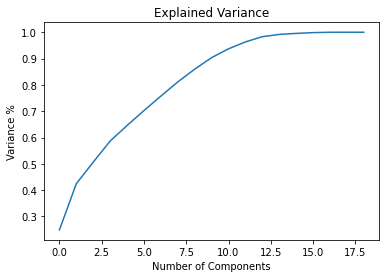

In [124]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

15 components explain around 95% variance in Data

#### Feature  engineering  and  feature selection
 Kbest

In [125]:
from sklearn.feature_selection import SelectKBest, f_classif

In [126]:
bestfeat = SelectKBest(score_func = f_classif, k = 19)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [127]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(19,'Score'))

                                              Feature     Score
13                                   primary_fuel_Gas  5.619707
6                                 generation_gwh_2018  4.794625
5                                 generation_gwh_2017  4.641176
4                                 generation_gwh_2016  4.269304
15                               primary_fuel_Nuclear  3.637388
18                                  primary_fuel_Wind  3.564033
2                                 generation_gwh_2014  3.393717
8                   geolocation_source_Industry About  3.385337
10                             geolocation_source_WRI  3.265825
17                                 primary_fuel_Solar  3.197604
3                                 generation_gwh_2015  3.143672
12                                  primary_fuel_Coal  3.143098
16                                   primary_fuel_Oil  2.457972
7                                                 Age  2.108357
14                                 prima

##### Dropping highly multicollinear column: 'generation_gwh_2016'. 

In [128]:
x_best = X.drop(columns=['generation_gwh_2016']).copy()

In [129]:
scaled_x_best = scaler.fit_transform(x_best)

#### Model  Building  for  the  prediction 

#### Regression Model 

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Finding the Best Random State

In [132]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .22, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8537841501677567 on random_state: 16


In [144]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .22, random_state =16)

#### importing  some Base  models  

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [146]:
from sklearn.metrics import r2_score,mean_squared_error

In [153]:
rf = RandomForestRegressor(n_estimators=600, random_state=16, max_depth=4, n_jobs=-1)
Gb = GradientBoostingRegressor(n_estimators=600, random_state=16, learning_rate=0.1,max_depth=4,subsample=0.1,n_iter_no_change=50 )
xg = XGBRegressor()
SV= SVR(kernel='linear')
lr=LinearRegression(normalize=True)

#### Training All  the Models

Random  forest regressor

In [154]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=600, n_jobs=-1, random_state=16)

Xgboost  Regressor

In [155]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Support Vector regressor

In [156]:
SV.fit(x_train,y_train)

SVR(kernel='linear')

Gradient  boosting  Regressor

In [157]:
Gb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=600, n_iter_no_change=50,
                          random_state=16, subsample=0.1)

Linear regression regressor

In [158]:
lr.fit(x_train, y_train)

LinearRegression(normalize=True)


All models have been trained.

#### Random forest Regression Model prediction  score

In [159]:
y_pred_rf = rf.predict(x_test)
print('this is  the  r2_score  :', r2_score(y_pred_rf, y_test))
print('this  is  the mean_squared_error:', mean_squared_error(y_pred_rf, y_test))

this is  the  r2_score  : 0.8056480764128804
this  is  the mean_squared_error: 27722.194318050984


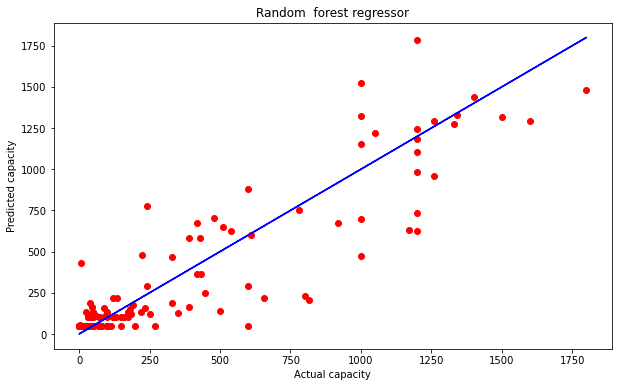

In [162]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=y_pred_rf,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual capacity")
plt.ylabel("Predicted capacity")
plt.title("Random  forest regressor")
plt.show()

####  Gradient boosting Regression Model

In [160]:
Gb = GradientBoostingRegressor(n_estimators=450, random_state=16, learning_rate=0.1,max_depth=2,subsample=0.1,n_iter_no_change=4)
Gb.fit(x_train, y_train)
GB_pred = Gb.predict(x_test)
print('this is  the  r2_score  :', r2_score(GB_pred, y_test))
print('this  is  the mean_squared_error:', mean_squared_error(GB_pred, y_test))


this is  the  r2_score  : 0.7759112865015609
this  is  the mean_squared_error: 28202.845581838534


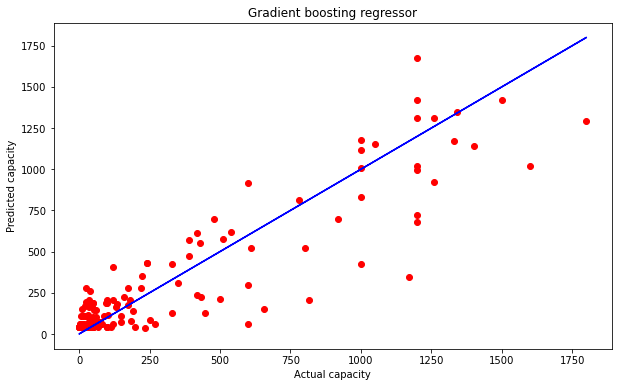

In [163]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=GB_pred,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual capacity")
plt.ylabel("Predicted capacity")
plt.title("Gradient boosting regressor")
plt.show()

#### XGB  regressor  model

In [164]:
XG_pred = xg.predict(x_test)
print('this is  the  r2_score  :', r2_score(XG_pred, y_test))
print('this  is  the mean_squared_error:', mean_squared_error(XG_pred, y_test))


this is  the  r2_score  : 0.8251850541226962
this  is  the mean_squared_error: 27875.229160125804


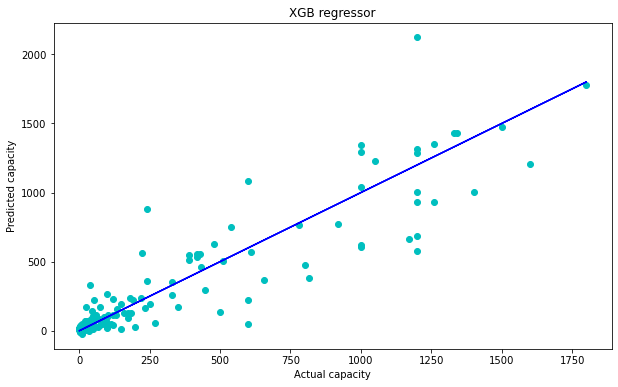

In [165]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=XG_pred,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual capacity")
plt.ylabel("Predicted capacity")
plt.title("XGB regressor")
plt.show()

#### Support Vector machine regressor Model

In [166]:
Sv_pred = SV.predict(x_test)
print('this is  the  r2_score  :', r2_score(Sv_pred, y_test))
print('this  is  the mean_squared_error:', mean_squared_error(Sv_pred, y_test))


this is  the  r2_score  : -0.6233799582396029
this  is  the mean_squared_error: 75254.15450688725


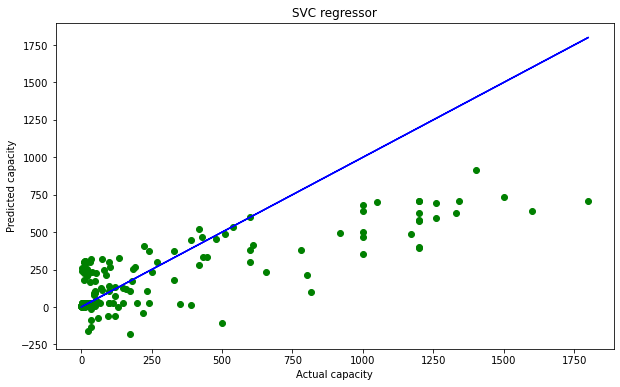

In [167]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=Sv_pred,color='g')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual capacity")
plt.ylabel("Predicted capacity")
plt.title("SVC regressor")
plt.show()

#### Linear Regression model

In [168]:
Lr_pred = lr.predict(x_test)
print('this is  the  r2_score  :', r2_score(Lr_pred, y_test))
print('this  is  the mean_squared_error:', mean_squared_error(Lr_pred, y_test))


this is  the  r2_score  : 0.4698854710202657
this  is  the mean_squared_error: 67085.59206211448


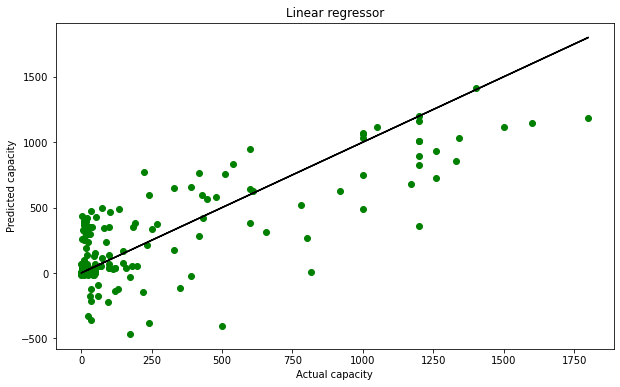

In [169]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=Lr_pred,color='g')
plt.plot(y_test,y_test,color='black')
plt.xlabel("Actual capacity")
plt.ylabel("Predicted capacity")
plt.title("Linear regressor")
plt.show()

#### Adaboost  regressor  model

In [170]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=600, random_state=16,learning_rate=0.1)
ab.fit(x_train, y_train)
ab_pred = ab.predict(x_test)
print('this is  the  r2_score  :', r2_score(ab_pred, y_test))
print('this  is  the mean_squared_error:', mean_squared_error(ab_pred, y_test))


this is  the  r2_score  : 0.3995418860104297
this  is  the mean_squared_error: 62560.37550739231


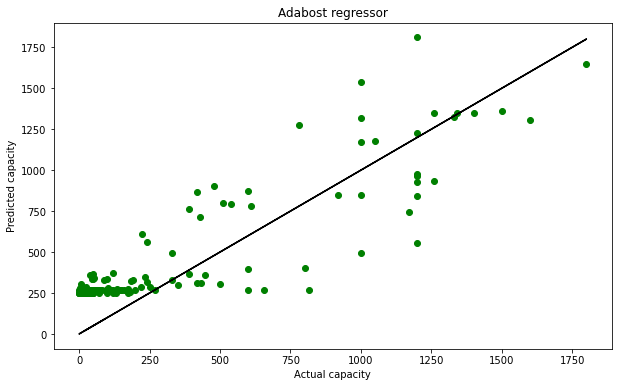

In [171]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=ab_pred,color='g')
plt.plot(y_test,y_test,color='black')
plt.xlabel("Actual capacity")
plt.ylabel("Predicted capacity")
plt.title("Adabost regressor")
plt.show()

so  right  now  we  can see  that  the  best  score is  being  given  by  the  Random  forest  regressor among  all  the other  models

### Model Cross Validation

In [172]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Random forest Regression

In [173]:
cross_val_score(rf,scaled_x_best,y,cv=6).mean()

0.754784417820297

####  Gradient  boosting Regression

In [174]:
cross_val_score(Gb,scaled_x_best,y,cv=6).mean()

0.7470245465957105

#### XGB Regression

In [175]:
cross_val_score(xg,scaled_x_best,y,cv=6).mean()

0.7288547786957276

#### SV Regression

In [176]:
cross_val_score(SV,scaled_x_best,y,cv=6).mean()

0.4651866551444695

#### Linear  Regression

In [177]:
cross_val_score(lr,scaled_x_best,y,cv=6).mean()

0.5659574440151989

#### Adaboost  regression

In [178]:
cross_val_score(ab,scaled_x_best,y,cv=6).mean()

0.58123094968254

###### So  the  CV score  is  the best  for  the Random forest regressor  only  which is  75%

### HyperParameter Tuning

for  Random forest Using GridsearchCV

In [179]:
parameter = {'n_estimators':[30,60,80,100,200],
             'max_depth': [1,2,3,4],
             'max_samples':[0,0.01,0.001,0.1,1],
             'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

In [180]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=6,n_jobs = -1,verbose = 1)

In [181]:
GridCV.fit(x_train,y_train)

Fitting 6 folds for each of 600 candidates, totalling 3600 fits


GridSearchCV(cv=6, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0, 0.01, 0.001, 0.1, 1],
                         'n_estimators': [30, 60, 80, 100, 200]},
             verbose=1)

In [182]:
GridCV.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'max_features': 'auto',
 'max_samples': 0.1,
 'n_estimators': 80}

In [183]:
Best_mod1 = RandomForestRegressor(n_estimators = 80,criterion = 'mae', max_depth= 4, max_features = 'auto',max_samples=0.1)


In [184]:
Best_mod1.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=4, max_samples=0.1,
                      n_estimators=80)

In [185]:
rfpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


85.29770560533356


##### Random Forest Regressor has an accuracy of 85.94 %

### Plotting  the  Final  model for prediction

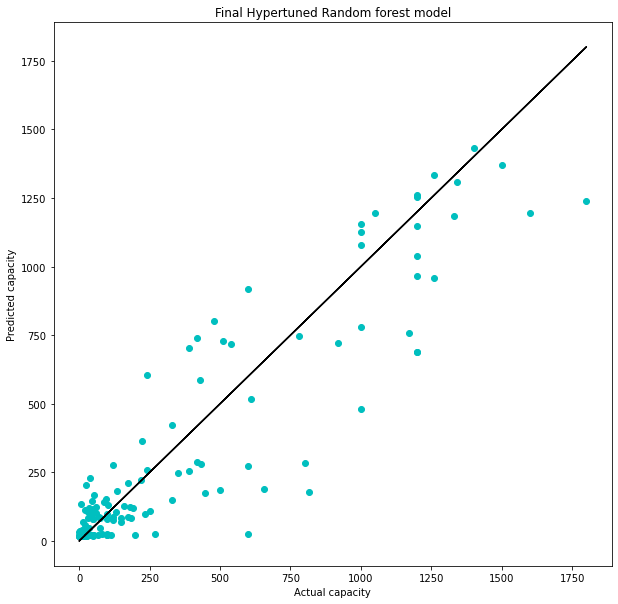

In [186]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=rfpred,color='c')
plt.plot(y_test,y_test,color='black')
plt.xlabel("Actual capacity")
plt.ylabel("Predicted capacity")
plt.title("Final Hypertuned Random forest model")
plt.show()

#### Saving The Model

In [187]:
import joblib
joblib.dump(Best_mod1,"BestModelpowercapacity.pkl")

['BestModelpowercapacity.pkl']

#### prediction  by The Model

In [188]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_mod1.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,21.0,28.811438
1,920.0,723.054750
2,1.0,18.699250
3,16.0,21.073938
4,5.0,18.255500
...,...,...
183,1800.0,1237.708125
184,15.0,20.558313
185,81.5,25.344563
186,135.0,180.725475


#### Target/ Label column ('primary_fuel') has Categorical type of Data.


#### Classification Models here 

#### Encoding the  categorical Feature Column.

#### Encoding using get_dummies()

In [189]:
dumm = pd.get_dummies(powrDF[['geolocation_source']],drop_first = False)

In [190]:
powrDF = powrDF.join(dumm)

In [191]:
powrDF.drop(columns = ['geolocation_source'],axis = 1, inplace = True)

### Encoding the Label Column.

Encoding the categorical data using Label Encoding Technique

In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
labenc = LabelEncoder()

In [194]:
powrDF['primary_fuel'] = labenc.fit_transform(powrDF['primary_fuel'])

In [195]:
powrDF

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,1.171257,-0.930084,6,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.105732,0,1,0
1,98.0,0.596967,-0.511383,1,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1
2,39.2,0.120520,-2.364717,7,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1
3,135.0,0.447512,2.442641,2,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.248372,0,0,1
4,1800.0,0.129881,1.252442,1,1.426798,2.286603,2.276671,1.983083,2.347272,-1.776648,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,-0.798944,0.217674,1,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983060,0,0,1
903,3.0,-1.345620,0.407395,6,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,1,0,0
904,25.5,-0.963692,-0.237493,7,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1
905,80.0,0.527406,-0.770182,1,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.050594,0,0,1


### Finding Correlation 

In [196]:
P_corr = powrDF.corr()
P_corr

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
capacity_mw,1.000000,0.050307,0.256838,-0.398039,0.466805,0.519018,0.582540,0.603896,0.613179,-0.331141,-0.231883,-0.032010,0.234923
latitude,0.050307,1.000000,-0.068115,-0.000873,0.105999,0.100775,0.119213,0.100141,0.107471,-0.106203,0.196149,0.073447,-0.207771
longitude,0.256838,-0.068115,1.000000,-0.406369,0.033177,0.033772,0.089248,0.076899,0.098191,-0.144126,-0.293512,-0.085886,0.306214
primary_fuel,-0.398039,-0.000873,-0.406369,1.000000,-0.139275,-0.156228,-0.173195,-0.158198,-0.171149,0.148275,0.471644,0.080782,-0.480885
generation_gwh_2014,0.466805,0.105999,0.033177,-0.139275,1.000000,0.840179,0.783428,0.712174,0.714425,-0.041357,-0.017678,-0.003028,0.018025
generation_gwh_2015,0.519018,0.100775,0.033772,-0.156228,0.840179,1.000000,0.880793,0.771584,0.770922,-0.105553,-0.019717,-0.003377,0.020103
generation_gwh_2016,0.582540,0.119213,0.089248,-0.173195,0.783428,0.880793,1.000000,0.895963,0.885985,-0.192430,-0.018498,-0.003168,0.018860
generation_gwh_2017,0.603896,0.100141,0.076899,-0.158198,0.712174,0.771584,0.895963,1.000000,0.935698,-0.172890,-0.014133,-0.002421,0.014410
generation_gwh_2018,0.613179,0.107471,0.098191,-0.171149,0.714425,0.770922,0.885985,0.935698,1.000000,-0.182809,-0.022942,-0.003930,0.023392
Age,-0.331141,-0.106203,-0.144126,0.148275,-0.041357,-0.105553,-0.192430,-0.172890,-0.182809,1.000000,0.020299,-0.094959,-0.001485


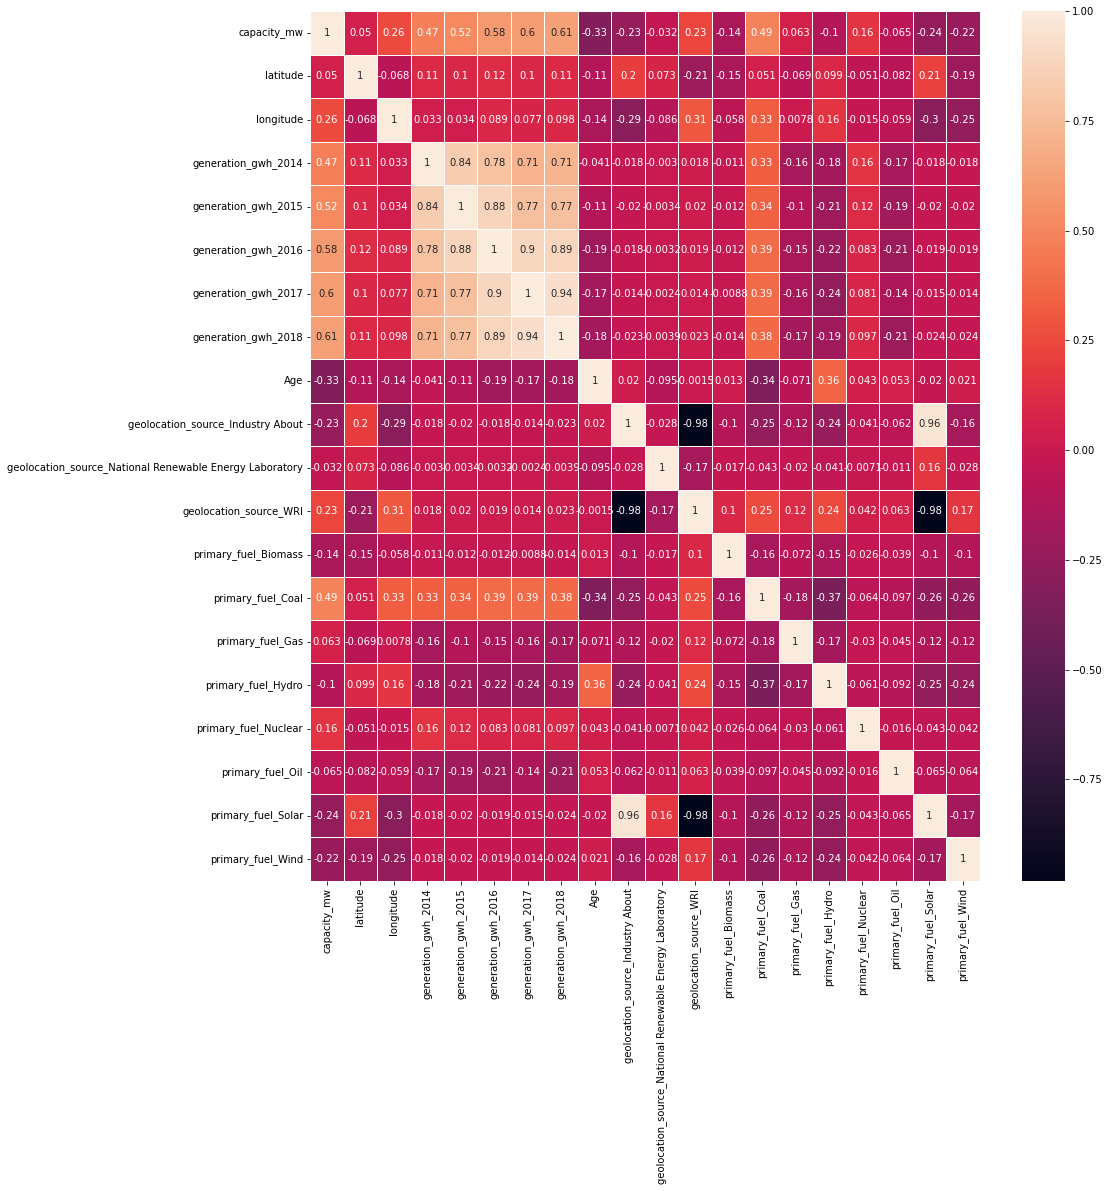

In [197]:
plt.figure(figsize=(15,16))
sns.heatmap(p_corr,annot=True,linewidth=1)
plt.show()

#### Visualizing correlation of feature columns with label column.

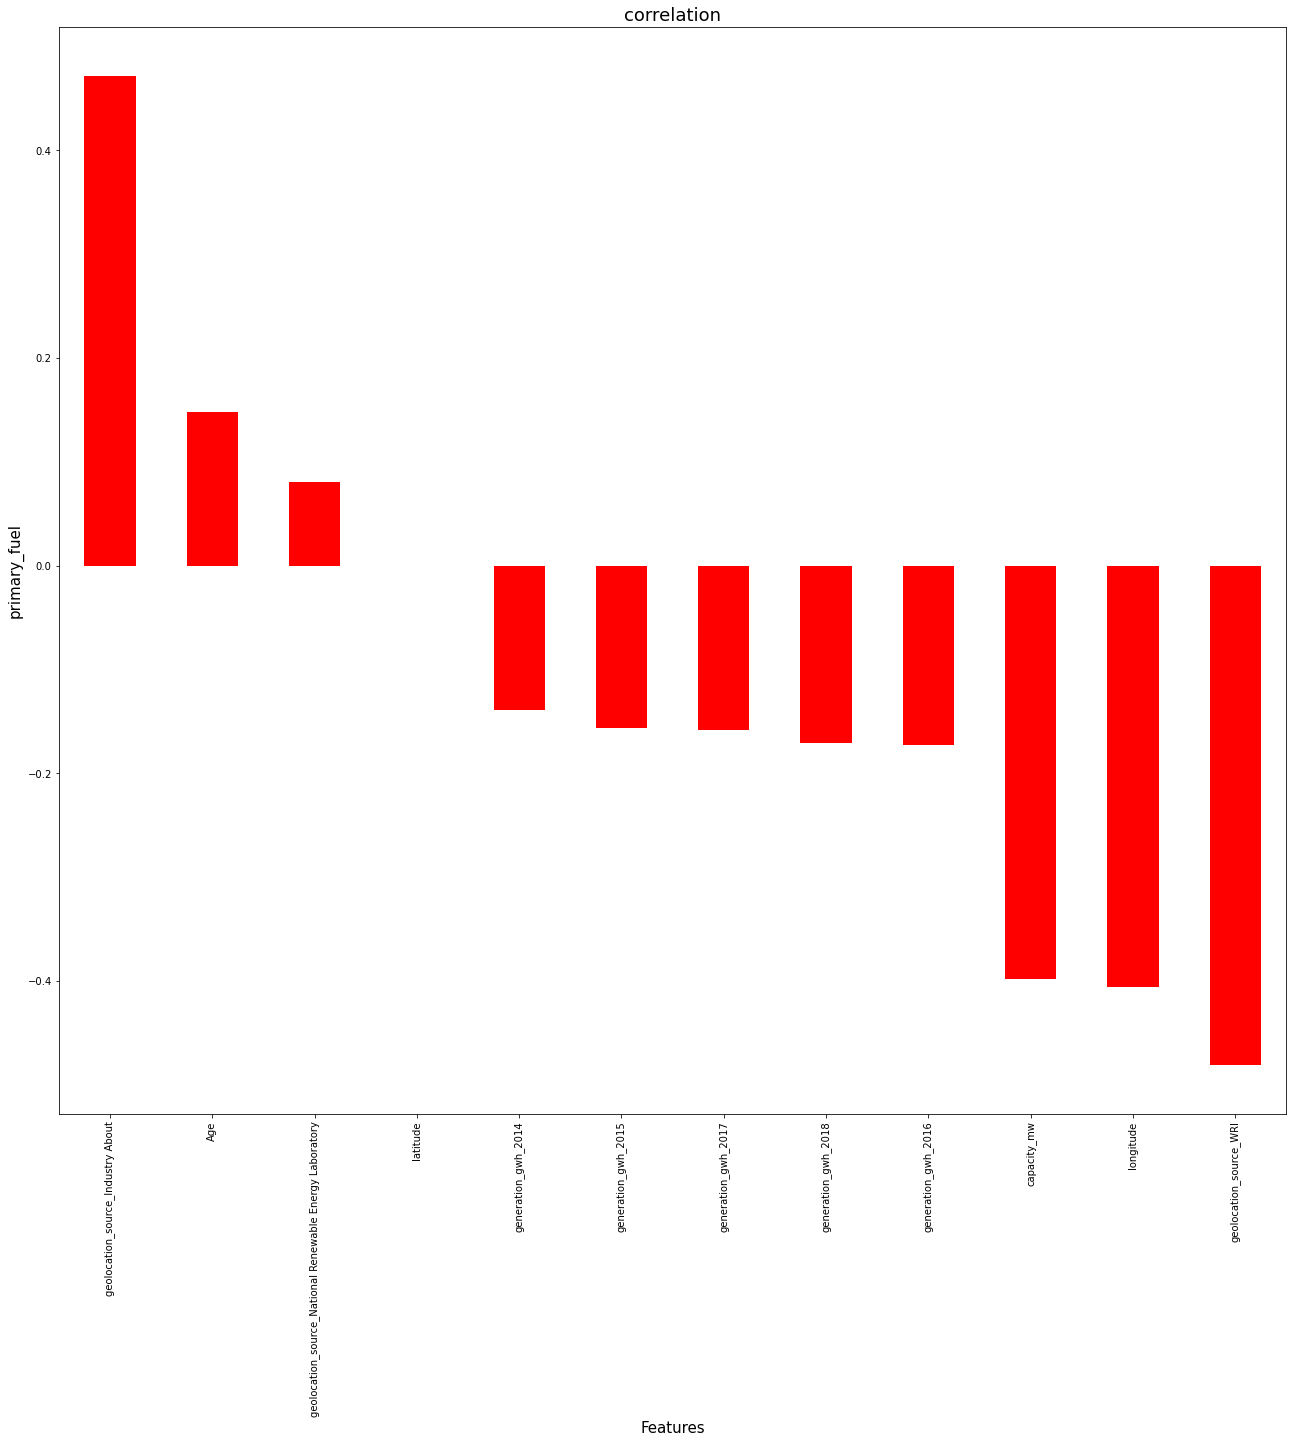

In [198]:
plt.figure(figsize = (22,20))
powrDF.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind='bar',cmap='autumn')
plt.xlabel('Features',fontsize=15)
plt.ylabel('primary_fuel',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

geolocation_source_Industry About has the highest positive correlation followed by Age,Geolocation_source_WRI,longitude and capacity_mw have the highest negative correlation with primary_fuel

In [199]:
X = powrDF.drop(columns = ['primary_fuel'])
y = powrDF['primary_fuel']

#### Feature Scaling 

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [202]:
scaled_X

array([[-0.6147947 ,  1.1712573 , -0.9300844 , ..., -0.40122595,
        14.55163221, -2.44446514],
       [-0.40201291,  0.59696731, -0.51138301, ..., -0.40122595,
        -0.06872081,  0.40908745],
       [-0.5330241 ,  0.12052001, -2.36471724, ..., -0.40122595,
        -0.06872081,  0.40908745],
       ...,
       [-0.56354882, -0.9636925 , -0.23749318, ..., -0.40122595,
        -0.06872081,  0.40908745],
       [-0.44211838,  0.52740603, -0.77018172, ..., -0.40122595,
        -0.06872081,  0.40908745],
       [-0.58360155, -1.81265663,  0.24648813, ..., -0.40122595,
        -0.06872081,  0.40908745]])

#### Checking for Multicollinearity using Variance Inflation Factor

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [204]:
vif = pd.DataFrame()

In [205]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [206]:
vif.head(10)

,Features,vif
0,capacity_mw,2.003616
1,latitude,1.075094
2,longitude,1.179825
3,generation_gwh_2014,3.614010
4,generation_gwh_2015,6.202012
5,generation_gwh_2016,9.980373
6,generation_gwh_2017,9.867453
7,generation_gwh_2018,9.091592
8,Age,1.212634
9,geolocation_source_Industry About,inf


multicollinearity exists among generation_gwh_2014,generation_gwh_2016,generation_gwh_2015 

### Principle Component Analysis

In [207]:
from sklearn.decomposition import PCA

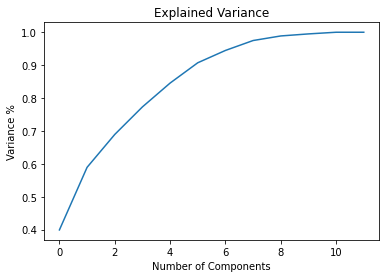

In [208]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

10 components explain around 95% variance in Data

#### Feature engineering using Selecting Kbest Features

In [209]:
from sklearn.feature_selection import SelectKBest, f_classif

In [210]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [211]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(64,'Score'))

                                              Feature        Score
11                             geolocation_source_WRI  3129.232416
9                   geolocation_source_Industry About  1513.317316
0                                         capacity_mw    57.331958
2                                           longitude    36.427739
5                                 generation_gwh_2016    32.642821
7                                 generation_gwh_2018    32.533027
6                                 generation_gwh_2017    30.007242
8                                                 Age    27.821737
3                                 generation_gwh_2014    26.370400
4                                 generation_gwh_2015    25.058486
1                                            latitude    15.134116
10  geolocation_source_National Renewable Energy L...     3.363862


Dropping highly collinear column 'generation_gwh_2016' and column with lowest sccore.

In [212]:
x_best = X.drop(columns=['generation_gwh_2016','geolocation_source_National Renewable Energy Laboratory']).copy()

In [213]:
scaled_x_best = scaler.fit_transform(x_best)

#### Classification Model Building

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Over Sampling  the data

In [215]:

from imblearn.over_sampling import SMOTE as sm

In [216]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y.ravel()) #since class imbalace exists

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

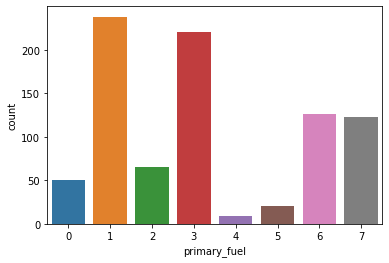

In [217]:
sns.countplot(data=powrDF,x=y)

#### Finding the best random state

In [218]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .20, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9422572178477691 on random_state: 72


In [219]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .20,random_state = 72)

#### Importing some Base models   for  the predictions

In [220]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [221]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### Calling  the  instances 

In [262]:
RFC = RandomForestClassifier(n_estimators=600,random_state=72,max_depth=4, verbose=4)
XGBC= XGBClassifier()
KNNC = KNeighborsClassifier(n_neighbors=11)
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC(kernel='linear',probability=True)

### Training the Models

In [263]:
RFC.fit(x_train,y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.5s finished


RandomForestClassifier(max_depth=4, n_estimators=600, random_state=72,
                       verbose=4)

In [264]:
XGBC.fit(x_train,y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [265]:
adbc.fit(x_train,y_train.ravel())

AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=72)

In [266]:
SV.fit(x_train,y_train.ravel())

SVC(kernel='linear', probability=True)

In [267]:
LOGR.fit(x_train,y_train.ravel())

LogisticRegression(solver='liblinear')

In [273]:
KNNC.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=11)

All Models have been trained.

### Logistic Regression Model Accuracy

In [251]:
LOGRpred = LOGR.predict(x_test)
print('this  is  the classifiaction report',classification_report(y_test,LOGRpred))
print('this  the  confusion matrix', confusion_matrix(y_test, LOGRpred))
print('This  the accuracy score', accuracy_score(y_test, LOGRpred))

this  is  the classifiaction report               precision    recall  f1-score   support

           0       0.45      0.52      0.48        54
           1       0.61      0.39      0.47        44
           2       0.60      0.23      0.33        39
           3       0.60      0.58      0.59        43
           4       0.80      0.92      0.85        51
           5       0.71      0.66      0.68        44
           6       1.00      1.00      1.00        62
           7       0.31      0.50      0.38        44

    accuracy                           0.63       381
   macro avg       0.63      0.60      0.60       381
weighted avg       0.65      0.63      0.62       381

this  the  confusion matrix [[28  0  0  0  0  0  0 26]
 [ 7 17  4  5  9  0  0  2]
 [ 0  6  9  7  2  8  0  7]
 [ 4  5  2 25  1  4  0  2]
 [ 0  0  0  4 47  0  0  0]
 [ 2  0  0  0  0 29  0 13]
 [ 0  0  0  0  0  0 62  0]
 [21  0  0  1  0  0  0 22]]
This  the accuracy score 0.6272965879265092


### Random Forest Classifier Model Accuracy

In [268]:
RFCpred = RFC.predict(x_test)
print('this  is  the classifiaction report',classification_report(y_test,RFCpred))
print('this  the  confusion matrix', confusion_matrix(y_test,RFCpred))
print('This  the accuracy score', accuracy_score(y_test, RFCpred))

this  is  the classifiaction report               precision    recall  f1-score   support

           0       0.62      0.98      0.76        54
           1       0.90      0.41      0.56        44
           2       0.69      0.51      0.59        39
           3       0.78      0.84      0.81        43
           4       0.79      0.96      0.87        51
           5       0.90      0.64      0.75        44
           6       1.00      1.00      1.00        62
           7       0.46      0.48      0.47        44

    accuracy                           0.75       381
   macro avg       0.77      0.73      0.73       381
weighted avg       0.78      0.75      0.74       381

this  the  confusion matrix [[53  0  0  0  0  0  0  1]
 [ 3 18  5  2  7  0  0  9]
 [ 1  0 20  3  6  2  0  7]
 [ 0  2  4 36  0  1  0  0]
 [ 0  0  0  2 49  0  0  0]
 [ 5  0  0  3  0 28  0  8]
 [ 0  0  0  0  0  0 62  0]
 [23  0  0  0  0  0  0 21]]
This  the accuracy score 0.7532808398950132


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


### XGB Classifier Model Accuracy

In [269]:
XGBCpred = XGBC.predict(x_test)
print('this  is  the classifiaction report',classification_report(y_test,XGBCpred))
print('this  the  confusion matrix', confusion_matrix(y_test,XGBCpred))
print('This  the accuracy score', accuracy_score(y_test, XGBCpred))

this  is  the classifiaction report               precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.86      0.73      0.79        44
           2       0.97      0.79      0.87        39
           3       0.86      1.00      0.92        43
           4       0.94      1.00      0.97        51
           5       0.95      0.89      0.92        44
           6       1.00      1.00      1.00        62
           7       0.80      0.82      0.81        44

    accuracy                           0.91       381
   macro avg       0.91      0.90      0.90       381
weighted avg       0.91      0.91      0.91       381

this  the  confusion matrix [[52  0  0  0  0  0  0  2]
 [ 1 32  0  5  2  1  0  3]
 [ 1  3 31  0  1  1  0  2]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  0  0 51  0  0  0]
 [ 1  0  1  1  0 39  0  2]
 [ 0  0  0  0  0  0 62  0]
 [ 5  2  0  1  0  0  0 36]]
This  the accuracy score 0.9081364829396326


### SV Classifier Model Accuracy

In [270]:
SVpred = SV.predict(x_test)
print('this  is  the classifiaction report',classification_report(y_test,SVpred))
print('this  the  confusion matrix', confusion_matrix(y_test,SVpred))
print('This  the accuracy score', accuracy_score(y_test, SVpred))


this  is  the classifiaction report               precision    recall  f1-score   support

           0       0.52      1.00      0.69        54
           1       0.55      0.48      0.51        44
           2       0.88      0.36      0.51        39
           3       0.67      0.70      0.68        43
           4       0.84      0.96      0.90        51
           5       0.94      0.66      0.77        44
           6       1.00      1.00      1.00        62
           7       0.36      0.23      0.28        44

    accuracy                           0.71       381
   macro avg       0.72      0.67      0.67       381
weighted avg       0.73      0.71      0.69       381

this  the  confusion matrix [[54  0  0  0  0  0  0  0]
 [ 7 21  2  6  6  0  0  2]
 [ 1  9 14  6  2  2  0  5]
 [ 6  6  0 30  1  0  0  0]
 [ 0  2  0  0 49  0  0  0]
 [ 4  0  0  0  0 29  0 11]
 [ 0  0  0  0  0  0 62  0]
 [31  0  0  3  0  0  0 10]]
This  the accuracy score 0.7060367454068242


### K Nearest Neighbours Classifier Model Accuracy

In [274]:
KNNpred = KNNC.predict(x_test)
print('this  is  the classifiaction report',classification_report(y_test,KNNpred))
print('this  the  confusion matrix', confusion_matrix(y_test,KNNpred))
print('This  the accuracy score', accuracy_score(y_test, KNNpred))



this  is  the classifiaction report               precision    recall  f1-score   support

           0       0.78      0.96      0.86        54
           1       0.77      0.55      0.64        44
           2       0.81      0.74      0.77        39
           3       0.85      0.77      0.80        43
           4       0.91      0.96      0.93        51
           5       0.83      0.86      0.84        44
           6       0.95      1.00      0.98        62
           7       0.79      0.77      0.78        44

    accuracy                           0.84       381
   macro avg       0.84      0.83      0.83       381
weighted avg       0.84      0.84      0.84       381

this  the  confusion matrix [[52  0  0  0  0  0  0  2]
 [ 4 24  5  3  5  0  0  3]
 [ 1  0 29  1  0  6  2  0]
 [ 1  4  1 33  0  0  1  3]
 [ 0  0  0  2 49  0  0  0]
 [ 4  0  1  0  0 38  0  1]
 [ 0  0  0  0  0  0 62  0]
 [ 5  3  0  0  0  2  0 34]]
This  the accuracy score 0.84251968503937


### Model Cross Validation

In [275]:
from sklearn.model_selection import cross_val_score as cvs

#### Logistic Regression

In [276]:
print(cvs(LOGR,smt_x,smt_y,cv=6).mean()) 

0.5955796281967344


#### Random Forest Classifier

In [277]:
print(cvs(RFC,smt_x,smt_y,cv=6).mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


#### XGB Classifier

In [279]:
print(cvs(XGBC,smt_x,smt_y,cv=6).mean())

0.9070508369210827


#### SV Classifier

In [280]:
print(cvs(SV,smt_x,smt_y,cv=6).mean())

0.6585950571725228


#### K Nearest Neighbours Classifier

In [282]:
print(cvs(KNNC,smt_x,smt_y,cv=6).mean())

0.804097309022611


### ROC AUC Scores

In [288]:
from sklearn.metrics import roc_curve,  roc_auc_score
from sklearn.metrics import plot_roc_curve

### Hyper Parameter Tuning

#### XGB Classifier

In [314]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [315]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [316]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [317]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.2,
 'max_depth': 10,
 'min_child_weight': 0,
 'subsample': 0.5}

In [318]:
Best_mod = XGBClassifier(booster = 'gbtree',eta = 0.2, max_depth= 10, min_child_weight = 0,subsample = 0.5)
Best_mod.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.2,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=0,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, ...)

In [319]:
xgbpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

92.38845144356955


In [320]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[54,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 32,  1,  5,  1,  1,  0,  3],
       [ 1,  2, 32,  0,  2,  1,  0,  1],
       [ 0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0],
       [ 1,  0,  1,  1,  0, 39,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 62,  0],
       [ 4,  0,  0,  1,  0,  0,  0, 39]], dtype=int64)

##### XGB Classifier has an accuracy of 92.3%

#### On comparing the accuracies of the 2 models it is determined that XGB classifier is the better model.

#### Saving The Model

In [321]:
import joblib
joblib.dump(Best_mod,"BestModelFueltype.pkl")

['BestModelFueltype.pkl']

#### Loading The Model

In [322]:
mod=joblib.load("BestModelFueltype.pkl")

In [323]:
print(mod.predict(x_test))

[5 1 1 3 3 0 3 0 3 7 3 4 5 0 5 5 3 4 5 3 6 4 0 7 3 2 2 3 5 7 2 6 3 4 1 4 2
 0 4 2 6 2 6 6 3 7 2 1 0 3 6 5 4 3 1 2 5 4 7 2 2 3 2 2 7 5 0 6 4 4 7 6 4 4
 0 3 0 4 4 4 1 7 6 4 1 3 5 5 0 1 1 5 7 7 3 4 0 6 7 5 0 7 5 3 7 6 1 6 3 4 6
 0 7 7 5 6 6 0 6 0 7 6 3 0 3 6 1 0 6 0 3 6 0 4 7 0 5 5 7 3 3 1 5 6 0 7 4 6
 5 4 1 4 7 1 0 0 6 6 4 6 6 2 0 6 5 4 5 0 0 2 0 0 3 7 2 0 1 5 7 0 4 7 5 7 2
 5 4 6 2 2 3 6 4 1 2 0 6 5 4 7 5 2 6 1 6 5 3 6 4 3 1 2 0 4 7 0 6 7 6 5 2 7
 0 7 4 4 2 5 4 6 0 6 1 0 5 4 3 1 5 2 6 6 0 4 6 4 4 6 4 3 0 6 4 0 7 0 6 3 0
 0 6 6 5 0 4 6 5 3 2 4 0 4 7 0 3 0 3 3 7 2 5 6 6 4 1 2 7 1 4 4 6 1 4 7 0 3
 7 6 1 7 0 5 0 2 0 6 4 0 3 2 3 0 4 1 6 6 7 6 6 3 3 5 2 2 1 7 4 1 4 6 1 1 5
 6 5 3 4 0 4 0 3 3 7 6 7 7 3 3 2 0 3 1 1 4 0 3 1 0 6 6 2 0 3 4 6 7 7 2 0 3
 7 5 1 5 3 5 0 1 6 7 0]


In [324]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
0,5,5
1,1,1
2,1,1
3,3,3
4,3,1
5,0,0
6,3,7
7,0,0
8,3,3
9,7,1
